<h1>Catatan Regresi Sederhana</h1>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../Data/socr.csv', sep=',')
print(df.head())

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [7]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


<h3>Praproses Data</h3>

In [6]:
# ubah ke cm dan kg
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "Tinggi(cm)", "Weight(Pounds)": "Berat(kg)"})
    .assign(Height=lambda x: x["Tinggi(cm)"] * 2.54, # 1 inch = 2.54 cm
            Weight=lambda x: x["Berat(kg)"] / 2.205 # 1 pound = 0.453592 kg
            )
    .round({"Tinggi(cm)": 2, "Berat(kg)": 2})
).copy()
df1.head()

,Tinggi(cm),Berat(kg),Height,Weight
0,65.78,112.99,167.089607,51.243764
1,71.52,136.49,181.648633,61.899002
2,69.40,153.03,176.272800,69.399955
3,68.22,142.34,173.270164,64.551202
4,67.79,144.30,172.181037,65.440862


## Pembagian Data

In [7]:
# Split Data Training 80% dan Testing 20%
from sklearn.model_selection import train_test_split

# Variabel independen (X) dan dependen (y)
X = df1[["Tinggi(cm)"]]
y = df1["Berat(kg)"]

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train)
print(y_train)

       Tinggi(cm)
3253        65.80
18789       70.27
4466        66.83
19269       71.64
6527        69.92
...           ...
919         69.81
20691       68.41
5699        67.78
10742       69.74
16921       67.06

[20000 rows x 1 columns]
3253      99.52
18789    139.03
4466     136.97
19269    131.37
6527     138.29
          ...  
919      134.87
20691    130.32
5699     130.39
10742    152.70
16921    144.50
Name: Berat(kg), Length: 20000, dtype: float64


## Pemodelan Data : dengan Data Training

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Latih model dengan data training
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi pada data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2'] = r2
df_resume['Koefisien(Kg/cm)'] = model.coef_[0]
df_resume['Intercept'] = model.intercept_
df_resume['MAE'] = mean_absolute_error(y_test, y_pred)
df_resume['MSE'] = mean_squared_error(y_test, y_pred)
df_resume['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE'] = mse
df_resume['RMSE'] = rmse
df_resume

,R2,Koefisien(Kg/cm),Intercept,MAE,MSE,RMSE


## Cetak Persamaan Regresi

In [12]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f}x + {intercept:.3f}")

Persamaan: y = 3.090x + -83.029


ValueError: x and y must be the same size

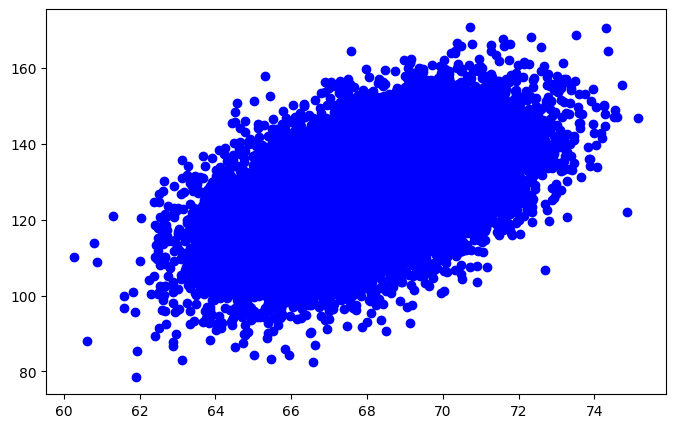

In [41]:
import matplotlib.pyplot as plt

# Visualisasi data dan garis regresi
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Data Training')
plt.scatter(X_test, y_test, color='green', label='Data Testing')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresi Linier')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.title('Visualisasi Model Regresi Linier')
plt.legend()
plt.show()

In [13]:
y_pred_test = model.predict(X_test)

# Visualisasi hasil prediksi
hasil = pd.DataFrame({'Tinggi(cm)': X_test['Tinggi(cm)'], 'Berat Aktual(kg)': y_test, 'Berat Prediksi(kg)': y_pred_test})

# 1) Selisih error(positif = overprodict)
hasil['Selisih Error(kg)'] = hasil['Berat Prediksi(kg)'] - hasil['Berat Aktual(kg)']
# 2) Akurasi per-baris (100% - (|Aktual - Prediksi| / Aktual * 100%)
hasil['Akurasi(%)'] = (100 - np.abs(hasil['Selisih Error(kg)']) / hasil['Berat Aktual(kg)'] * 100)
# 3) Akurasi keseluruhan
hasil['Akurasi Keseluruhan(%)'] = (100 - np.abs(hasil['Selisih Error(kg)']).sum() / hasil['Berat Aktual(kg)'].sum() * 100)
print(hasil)

       Tinggi(cm)  Berat Aktual(kg)  Berat Prediksi(kg)  Selisih Error(kg)  \
21752       68.79            110.59          129.546182          18.956182   
7208        67.45            110.96          125.405309          14.445309   
17058       66.65            128.35          122.933145          -5.416855   
20754       64.29            129.89          115.640264         -14.249736   
22505       67.13            139.02          124.416443         -14.603557   
...           ...               ...                 ...                ...   
12738       70.37            124.77          134.428704           9.658704   
18236       64.19            104.61          115.331244          10.721244   
12253       65.56            115.65          119.564823           3.914823   
3562        66.02            110.01          120.986317          10.976317   
13692       67.45            121.88          125.405309           3.525309   

       Akurasi(%)  Akurasi Keseluruhan(%)  
21752   82.859045  

Data Buatan

In [ ]:
data = pd.read_csv('../Data/berat_TI2024.csv', sep=',')

y_pred = model.predict(data[['tinggi(cm)']])
data['prediksi_berat(kg)'] = y_pred
data["Selisih Error(kg)"] = data['prediksi_berat(kg)'] - data['aktual_berat(kg)']
denom = data['aktual_berat(kg)'].replace(0, np.nan)  # Ganti 0 dengan NaN untuk menghindari pembagian dengan nol
data['Akurasi(%)'] = (1 - (data["Selisih Error(kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- tinggi(cm)
Feature names seen at fit time, yet now missing:
- Tinggi(cm)


In [40]:
data.describe()

,no,tinggi(cm),aktual_berat(kg)
count,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.100000
std,1.581139,10.784248,9.955652
min,1.000000,155.000000,52.700000
25%,2.000000,160.000000,58.500000
50%,3.000000,162.000000,65.800000
75%,4.000000,168.000000,70.300000
max,5.000000,183.000000,78.200000
